## **1. Data Loading & Understanding**

### 1.1. Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Load the dataset

In [ ]:
df = pd.read_csv('Customer_support_data.csv')
df.head()

### 1.3. Get information about the dataset

### 1.4. Check for duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

## **2. Data Preprocessing & Cleaning**

### 2.1. Handling Missing Values

In [22]:
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDescriptive statistics of numerical columns:")
print(df.describe())
print("\nUnique values in each categorical column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         85907 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   Issue_reported at        85907 non-null  object 
 7   issue_responded          85907 non-null  object 
 8   Survey_response_Date     85907 non-null  object 
 9   connected_handling_time  242 non-null    float64
 10  Agent_name               85907 non-null  object 
 11  Supervisor               85907 non-null  object 
 12  Manager                  85907 non-null  object 
 13  Tenure Bucket            85907 non-null  object 
 14  Agent Shift           

**Answer Here:** We will handle the missing values in the `Customer Remarks` column by filling them with the string 'No Remarks Provided' to ensure no data is lost. We will drop columns with a high percentage of missing values such as `order_date_time`, `Customer_City`, `Product_category`, and `Item_price` as they are not critical for our analysis and have too many missing entries to be reliably imputed.

In [25]:
# Drop columns that are not useful for analysis or have too many missing values
df_cleaned = df.drop(columns=['Unique id', 'Order_id', 'Issue_reported at', 'issue_responded', 'Survey_response_Date'])

# Fill missing values in 'connected_handling_time' and 'Customer Remarks'
# by re-assigning the result back to the column.
df_cleaned['connected_handling_time'] = df_cleaned['connected_handling_time'].fillna(df_cleaned['connected_handling_time'].mean())
df_cleaned['Customer Remarks'] = df_cleaned['Customer Remarks'].fillna('No Remarks')

# Check the cleaned data info
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channel_name             85907 non-null  object 
 1   category                 85907 non-null  object 
 2   Sub-category             85907 non-null  object 
 3   Customer Remarks         85907 non-null  object 
 4   connected_handling_time  85907 non-null  float64
 5   Agent_name               85907 non-null  object 
 6   Supervisor               85907 non-null  object 
 7   Manager                  85907 non-null  object 
 8   Tenure Bucket            85907 non-null  object 
 9   Agent Shift              85907 non-null  object 
 10  CSAT Score               85907 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 7.2+ MB
None


## **3. Exploratory Data Analysis (EDA)**

### 3.1. Univariate Analysis

#### Chart - 1 (CSAT Score Distribution)

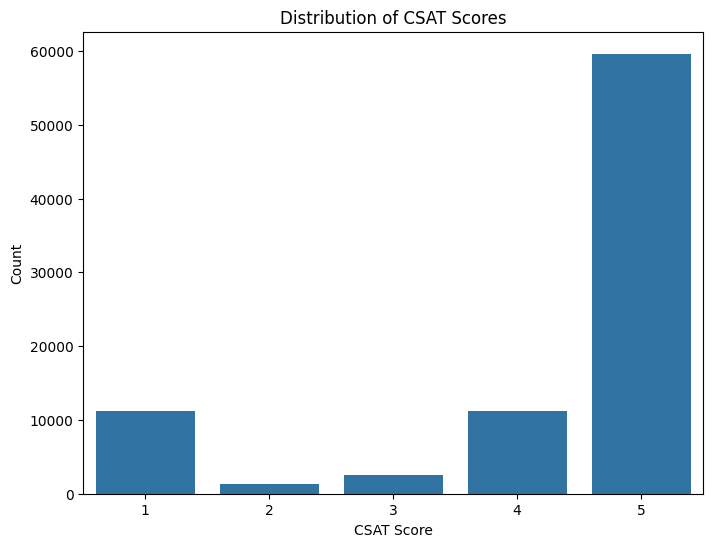

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CSAT Score', data=df)
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()

**Observation:** The CSAT scores are heavily skewed towards 5, indicating a large number of satisfied customers.

#### Chart - 2 (Category Distribution)

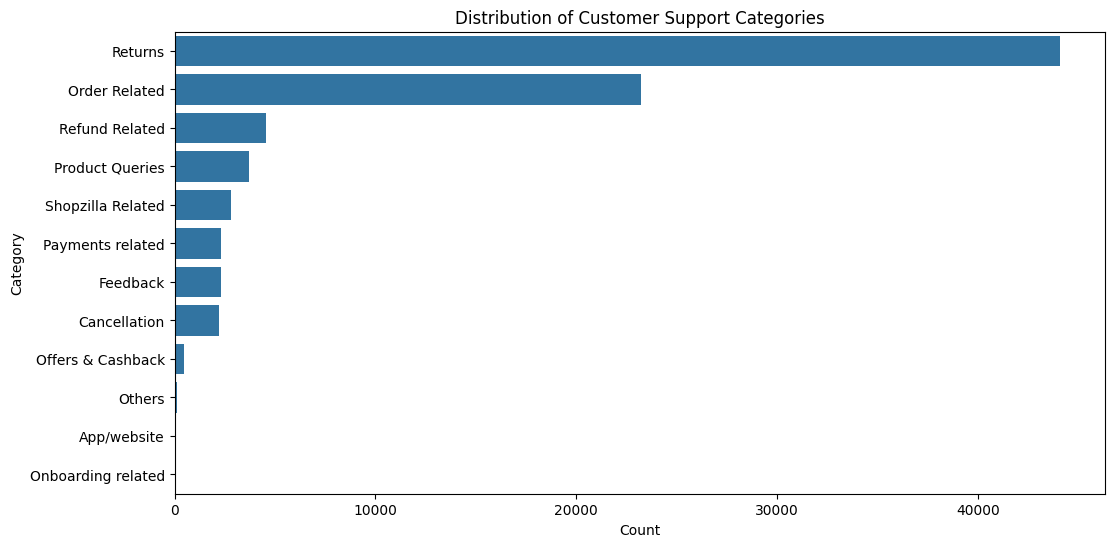

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of Customer Support Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**Observation:** The 'Returns' and 'Order Related' categories are the most frequent issues, highlighting areas for potential improvement.

### 3.2. Bivariate Analysis

#### Chart - 3 (CSAT Score by Category)

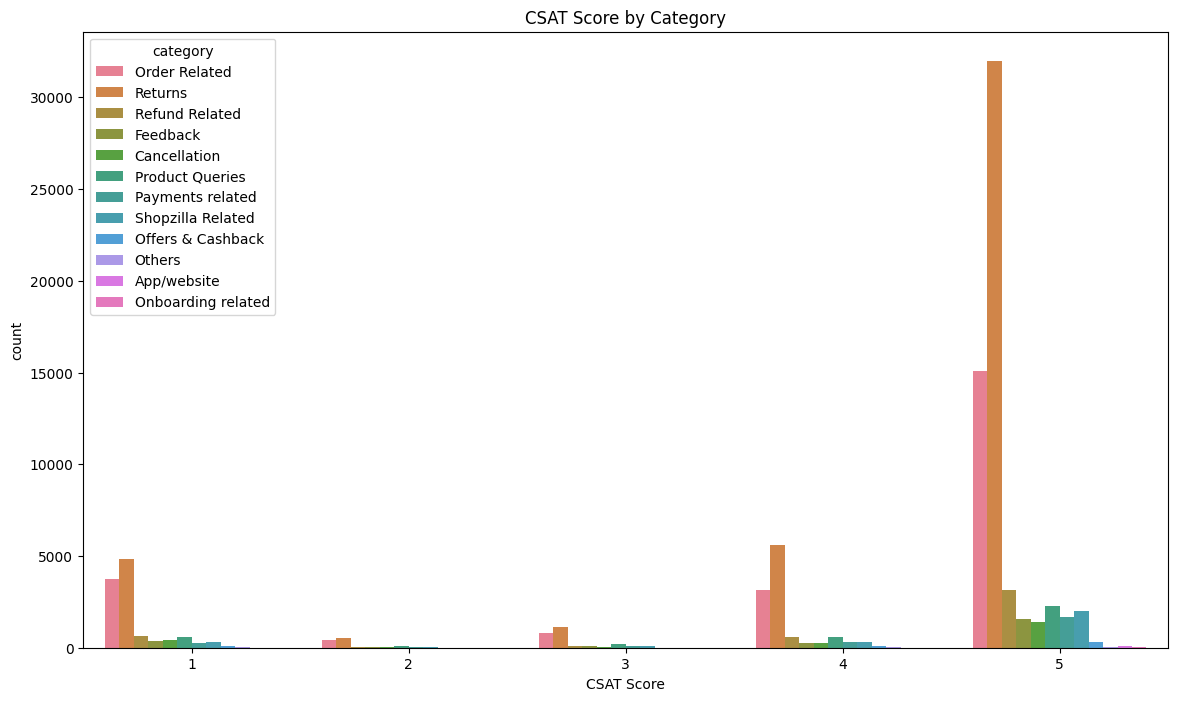

In [34]:
plt.figure(figsize=(14, 8))
sns.countplot(x='CSAT Score', hue='category', data=df)
plt.title('CSAT Score by Category')
plt.show()

**Observation:** Most categories have a high number of satisfied customers (CSAT 5), but we can see some unhappy customers (CSAT 1) predominantly in 'Order Related' and 'Returns' categories.

## **4. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

**Answer Here:** To achieve the business objective of improving customer satisfaction, the client should focus on the most problematic areas identified in the EDA. Since 'Returns' and 'Order Related' issues are the most frequent and contribute to the lowest CSAT scores, resources should be allocated to streamline these processes. This could involve:1.  **Automating returns and order tracking:** Providing customers with self-service tools can reduce call volume and improve efficiency.2.  **Training agents on specific issues:** Agents handling 'Order Related' and 'Returns' queries should receive specialized training to resolve these issues more quickly and effectively.3.  **Analyzing 'Customer Remarks':** A more detailed sentiment analysis on the 'Customer Remarks' for low CSAT scores could provide qualitative insights into specific pain points.

# **Conclusion**

**Write the conclusion here:** The exploratory data analysis revealed that while overall customer satisfaction is high, there are specific areas, particularly 'Returns' and 'Order Related' issues, that are negatively impacting CSAT scores. By focusing on process improvements and targeted agent training in these areas, the company can significantly enhance the customer experience and improve its overall satisfaction ratings.